In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
data= pd.read_csv('Country-data.csv')

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
data.shape

(167, 10)

In [17]:
data=data.drop('country', axis=1)

In [18]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [19]:
sse =[]
for k in range (1,20):
    km= KMeans(n_clusters= k)
    km.fit(data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])
    sse.append(km.inertia_)

C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

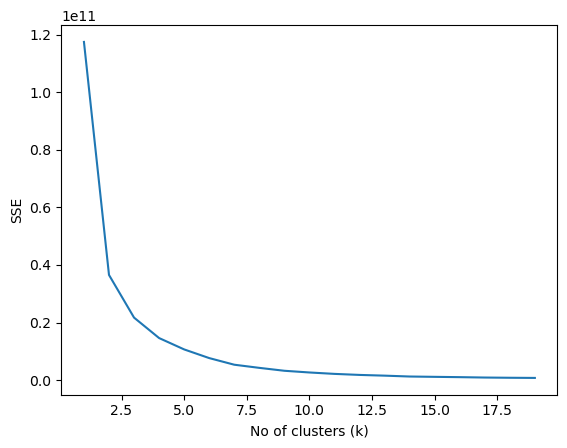

In [20]:
plt.xlabel('No of clusters (k)')
plt.ylabel('SSE')
plt.plot(range(1,20), sse)

In [16]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'clusters'],
      dtype='object')

In [21]:
scaler = MinMaxScaler()
data['child_mort'] = scaler.fit_transform(data[['child_mort']])
data['exports'] = scaler.fit_transform(data[['exports']])
data['health'] = scaler.fit_transform(data[['health']])
data['imports'] = scaler.fit_transform(data[['imports']])
data['inflation'] = scaler.fit_transform(data[['inflation']])
data['life_expec'] = scaler.fit_transform(data[['life_expec']])
data['total_fer'] = scaler.fit_transform(data[['total_fer']])
data['gdpp'] = scaler.fit_transform(data[['gdpp']])
data['clusters'] = scaler.fit_transform(data[['clusters']])

In [22]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,0.426485,0.049482,0.358608,0.257765,1610,0.126144,0.475345,0.736593,0.003073,0.5
1,0.068160,0.139531,0.294593,0.279037,9930,0.080399,0.871795,0.078864,0.036833,0.5
2,0.120253,0.191559,0.146675,0.180149,12900,0.187691,0.875740,0.274448,0.040365,0.5
3,0.566699,0.311125,0.064636,0.246266,5900,0.245911,0.552268,0.790221,0.031488,0.5
4,0.037488,0.227079,0.262275,0.338255,19100,0.052213,0.881657,0.154574,0.114242,0.5
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,2950,0.063118,0.609467,0.370662,0.026143,0.5
163,0.070594,0.142032,0.192666,0.100809,16500,0.463081,0.854043,0.208202,0.126650,0.5
164,0.100779,0.359651,0.312617,0.460715,4490,0.150725,0.808679,0.126183,0.010299,0.5
165,0.261441,0.149536,0.209447,0.197397,4480,0.257000,0.698225,0.555205,0.010299,0.5


In [26]:
km_model = KMeans(n_clusters= 5)
prediction = km_model.fit_predict(data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])

C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
km_model.cluster_centers_

array([[3.06561548e-02, 2.49946059e-01, 4.48986547e-01, 2.60658064e-01,
        3.71935484e+04, 7.18045258e-02, 9.31284596e-01, 1.28523456e-01,
        3.32756334e-01],
       [7.21704456e-02, 2.19622313e-01, 3.12586937e-01, 2.59393836e-01,
        1.68166667e+04, 1.04461783e-01, 8.14266930e-01, 1.40979420e-01,
        9.03047930e-02],
       [1.73876756e-02, 4.92937937e-01, 2.58989612e-01, 4.26548002e-01,
        7.07142857e+04, 1.05233211e-01, 9.41955480e-01, 9.28346102e-02,
        5.74301559e-01],
       [3.11587147e-02, 3.11124563e-01, 0.00000000e+00, 1.36454554e-01,
        1.25000000e+05, 1.03410036e-01, 9.34911243e-01, 1.45110410e-01,
        6.68795159e-01],
       [2.89152193e-01, 1.57203408e-01, 2.68540333e-01, 2.65818297e-01,
        4.46352326e+03, 1.28529797e-01, 6.51988441e-01, 4.26271000e-01,
        1.74334810e-02]])

In [28]:
data['clusters']= prediction
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,0.426485,0.049482,0.358608,0.257765,1610,0.126144,0.475345,0.736593,0.003073,4
1,0.068160,0.139531,0.294593,0.279037,9930,0.080399,0.871795,0.078864,0.036833,4
2,0.120253,0.191559,0.146675,0.180149,12900,0.187691,0.875740,0.274448,0.040365,1
3,0.566699,0.311125,0.064636,0.246266,5900,0.245911,0.552268,0.790221,0.031488,4
4,0.037488,0.227079,0.262275,0.338255,19100,0.052213,0.881657,0.154574,0.114242,1
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,2950,0.063118,0.609467,0.370662,0.026143,4
163,0.070594,0.142032,0.192666,0.100809,16500,0.463081,0.854043,0.208202,0.126650,1
164,0.100779,0.359651,0.312617,0.460715,4490,0.150725,0.808679,0.126183,0.010299,4
165,0.261441,0.149536,0.209447,0.197397,4480,0.257000,0.698225,0.555205,0.010299,4
